<a href="https://colab.research.google.com/github/hASEEBjAN/TensorFlow_Random_Programs/blob/master/linear_regression_with_eager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.enable_eager_execution()
tfe=tf.contrib.eager



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [ ]:
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

In [ ]:
learning_rate=0.001
display_step=50
num_steps=1000

In [ ]:
w=tfe.Variable(np.random.randn())
b=tfe.Variable(np.random.randn())


In [ ]:
def linear_regression(inputs):
  return inputs*w+b
def mean_square_fn(model_fn,inputs,labels):
  return tf.reduce_sum(tf.pow(model_fn(inputs) - labels,2))/(2*n_samples)

In [ ]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
gred=tfe.implicit_gradients(mean_square_fn)


In [ ]:
print('initial cost={:.9f}'.format(mean_square_fn(linear_regression,train_X,train_Y)),"W=",w.numpy(),"b=",b.numpy())

initial cost=1.942149043 W= 0.17486341 b= -0.64604163


epoch 0001 cost=  0.172852054 W= 0.42722565 b= -0.4460579
epoch 0050 cost=  0.171717674 W= 0.42618436 b= -0.4386753
epoch 0100 cost=  0.170573995 W= 0.4251281 b= -0.4311872
epoch 0150 cost=  0.169444129 W= 0.4240783 b= -0.42374438
epoch 0200 cost=  0.168327883 W= 0.42303482 b= -0.41634664
epoch 0250 cost=  0.167225063 W= 0.42199767 b= -0.40899366
epoch 0300 cost=  0.166135594 W= 0.42096677 b= -0.40168515
epoch 0350 cost=  0.165059283 W= 0.4199421 b= -0.39442083
epoch 0400 cost=  0.163995877 W= 0.41892365 b= -0.3872005
epoch 0450 cost=  0.162945360 W= 0.41791138 b= -0.38002384
epoch 0500 cost=  0.161907554 W= 0.41690522 b= -0.3728906
epoch 0550 cost=  0.160882205 W= 0.41590518 b= -0.36580056
epoch 0600 cost=  0.159869283 W= 0.41491115 b= -0.35875338
epoch 0650 cost=  0.158868551 W= 0.41392314 b= -0.35174888
epoch 0700 cost=  0.157879889 W= 0.41294113 b= -0.34478676
epoch 0750 cost=  0.156903163 W= 0.41196504 b= -0.33786675
epoch 0800 cost=  0.155938223 W= 0.41099486 b= -0.33098862
epoch

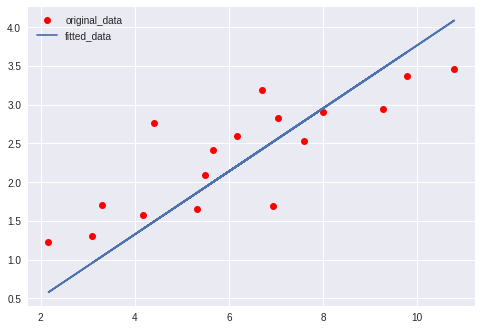

In [ ]:
for step in range(num_steps):
  optimizer.apply_gradients(gred(linear_regression,train_X,train_Y))
  if (step+1) % display_step == 0 or step==0:
    print("epoch",'%04d' % (step+1), "cost= ",'{:.09f}'.format(mean_square_fn(linear_regression,train_X,train_Y)),"W=",w.numpy(),"b=",b.numpy())
    
plt.plot(train_X,train_Y,'ro',label='original_data')
plt.plot(train_X,np.array(w*train_X+b),label='fitted_data')
plt.legend()
plt.show()